<a href="https://colab.research.google.com/github/loicdaloz/etfdata/blob/main/DCAvsLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DCA VS LS

In [52]:
#Import Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [59]:
#Load SPDR Data
from google.colab import files
files.upload()

Saving SPY.csv to SPY (2).csv


{'SPY.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n1993-01-29,43.968750,43.968750,43.750000,43.937500,25.122353,1003200\n1993-02-01,43.968750,44.250000,43.968750,44.250000,25.301016,480500\n1993-02-02,44.218750,44.375000,44.125000,44.343750,25.354616,201300\n1993-02-03,44.406250,44.843750,44.375000,44.812500,25.622656,529400\n1993-02-04,44.968750,45.093750,44.468750,45.000000,25.729858,531500\n1993-02-05,44.968750,45.062500,44.718750,44.968750,25.711990,492100\n1993-02-08,44.968750,45.125000,44.906250,44.968750,25.711990,596100\n1993-02-09,44.812500,44.812500,44.562500,44.656250,25.533304,122100\n1993-02-10,44.656250,44.750000,44.531250,44.718750,25.569040,379600\n1993-02-11,44.781250,45.125000,44.781250,44.937500,25.694117,19500\n1993-02-12,44.875000,44.875000,44.593750,44.593750,25.497566,42500\n1993-02-16,44.468750,44.468750,43.406250,43.468750,24.854321,374800\n1993-02-17,43.468750,43.531250,43.281250,43.437500,24.836445,210900\n1993-02-18,43.937500,43.937500,42.812500,43.406

In [60]:
#Read SPDR data
asset = pd.read_csv('SPY (2).csv')
#Set date as index
asset = asset.set_index(pd.DatetimeIndex(asset['Date'].values))
#Show data
asset

,Date,Open,High,Low,Close,Adj Close,Volume
1993-01-29,1993-01-29,43.968750,43.968750,43.750000,43.937500,25.122353,1003200
1993-02-01,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.301016,480500
1993-02-02,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.354616,201300
1993-02-03,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.622656,529400
1993-02-04,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.729858,531500
...,...,...,...,...,...,...,...
2023-03-15,2023-03-15,385.890015,389.489990,383.709991,389.279999,387.799957,172996900
2023-03-16,2023-03-16,386.820007,396.470001,386.290009,396.109985,394.603973,143254200
2023-03-17,2023-03-17,393.220001,394.399994,388.549988,389.989990,389.989990,140047400
2023-03-20,2023-03-20,390.799988,394.170013,390.070007,393.739990,393.739990,93055800


Text(0, 0.5, 'Adj. Close Price (USD)')

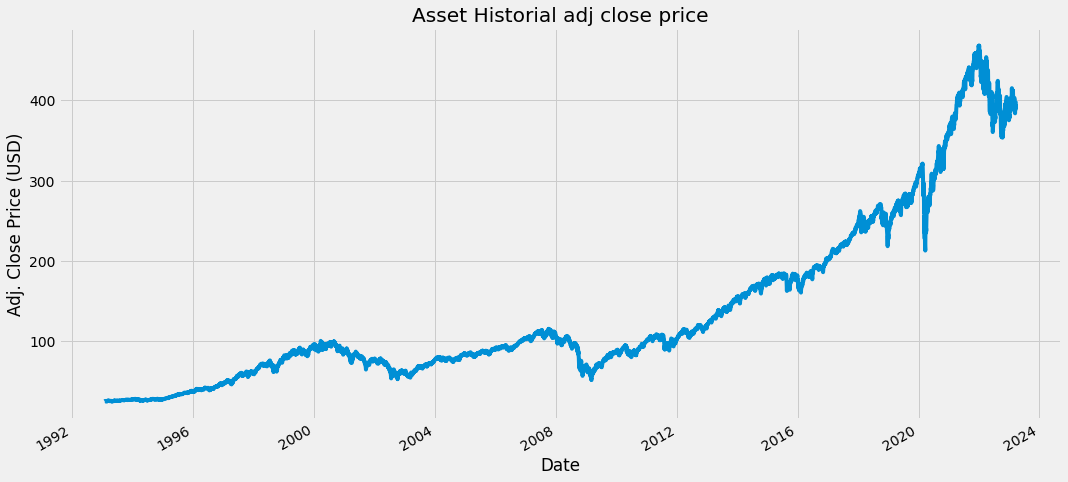

In [61]:
#Show the data visually to reflext Adj close price
asset['Adj Close'].plot(figsize = (16,8))
plt.title('Asset Historial adj close price')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price (USD)')

In [62]:
#Calculate and Show LS investment strategy
#Get adj close prices from dataset
adj_close_price = asset['Adj Close']
#Choose initial investment amount
initial_investment = 5000
#Get last price valie of the SPDR within data set
stock_latest_value = adj_close_price[-1]
#Get number of share bought on each date with hypothetical investment amount aka LS
num_shares_bought = initial_investment / adj_close_price
#Calculate how much money you would have according to the last price in this dataset for investing a LS on a given date in the past
lump_sum = stock_latest_value * num_shares_bought
#Show data
lump_sum

1993-01-29    79393.439779
1993-02-01    78832.803394
1993-02-02    78666.149785
1993-02-03    77843.218908
1993-02-04    77518.889533
                  ...     
2023-03-15     5143.244562
2023-03-16     5054.561425
2023-03-17     5114.362089
2023-03-20     5065.652640
2023-03-21     5000.000000
Name: Adj Close, Length: 7590, dtype: float64

In [63]:
#Compute and show best and worst day for LS
print('Lump Sum Investments:')
print('Best day to invest a $'+str(initial_investment)+ ' LS was on '+lump_sum.idxmax().strftime('%b %d %Y')+ ' and would be worth $'+str(round(lump_sum.max(), 2))+ ' on'+lump_sum.last_valid_index().strftime('%b %d %Y'))
print('Worst day to invest a $'+str(initial_investment)+ ' LS was on '+lump_sum.idxmin().strftime('%b %d %Y')+ ' and would be worth $'+str(round(lump_sum.min(), 2))+ ' on'+lump_sum.last_valid_index().strftime('%b %d %Y'))

Lump Sum Investments:
Best day to invest a $5000 LS was on Feb 18 1993 and would be worth $80365.17 onMar 21 2023
Worst day to invest a $5000 LS was on Jan 03 2022 and would be worth $4259.16 onMar 21 2023


Text(0, 0.5, 'Ivest Value in USD')

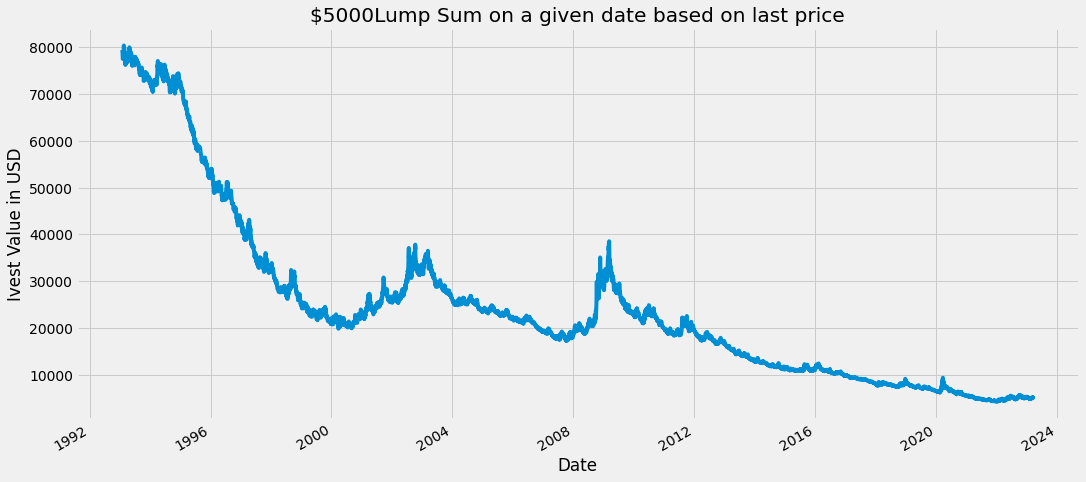

In [64]:
#Plot LS Data
lump_sum.plot(figsize=(16,8))
plt.title('$'+str(initial_investment)+'Lump Sum on a given date based on last price')
plt.xlabel('Date')
plt.ylabel('Ivest Value in USD')

In [65]:
#Create a function to calculate the DCA Stategy
def DCA(start_date, initial_investment):
    #Get the investement periods which will be 12 months
    investment_date_periods = 12.0

    #Calculate the portion or amount invested for each period
    investment_portion = initial_investment / investment_date_periods

    #Get dates of the investemnt periods
    all_investment_dates = pd.date_range(start_date, periods = investment_date_periods, freq = '30D')

    #Get the dates up to the last date in our dataset
    investment_dates = all_investment_dates[all_investment_dates < asset.index[-1]]

    #Get the indicices (and in turn the dates) within the dataset that arre the closest to the investment date as stock market is onot open everyday
    closest_investment_dates = asset.index.searchsorted(investment_dates)

    #Get list of stock prices at the closest investment date
    stock_prices = asset['Adj Close'][closest_investment_dates]

    #Get total number of shares invested in by summing all the share purchases on each on the investement dates
    total_shares_invested = sum(investment_portion / stock_prices)

    #Get the cash that was not invested from the initial investement amount
    uninvested_cash = investment_portion * sum(all_investment_dates >= asset.index[-1])

    #calculate total
    total = uninvested_cash + asset['Adj Close'][-1] * total_shares_invested
    return total

In [66]:
#Execute DCA function
DCA_List = []
for date in asset.index:
    DCA_List.append( DCA(date, initial_investment))

In [67]:
#Convert list into series
#Create new dataframe
dca = pd.DataFrame()
dca['DCA'] = DCA_List
#Set date as index
dca = dca.set_index(pd.DatetimeIndex(asset.index))
#Convert datafrae to series
dca = dca.squeeze()
#Show data
dca

1993-01-29    75946.619573
1993-02-01    75892.151541
1993-02-02    75914.052601
1993-02-03    75929.418782
1993-02-04    75796.353605
                  ...     
2023-03-15     5011.937047
2023-03-16     5004.546785
2023-03-17     5009.530174
2023-03-20     5005.471053
2023-03-21     5000.000000
Name: DCA, Length: 7590, dtype: float64

In [68]:
#Compute and show best and worst day initiating DCA
print('DCA Investments:')
print('Best day to start DCA a $'+str(initial_investment)+ ' investment was on '+dca.idxmax().strftime('%b %d %Y')+ ' and would be worth $'+str(round(dca.max(), 2))+ ' on'+dca.last_valid_index().strftime('%b %d %Y'))
print('worst to start DCA a $'+str(initial_investment)+ ' investment was on '+dca.idxmin().strftime('%b %d %Y')+ ' and would be worth $'+str(round(dca.min(), 2))+ ' on'+dca.last_valid_index().strftime('%b %d %Y'))

DCA Investments:
Best day to start DCA a $5000 investment was on Feb 23 1993 and would be worth $76078.23 onMar 21 2023
worst to start DCA a $5000 investment was on Jul 07 2021 and would be worth $4583.82 onMar 21 2023


Text(0, 0.5, 'Investment Value(USD)')

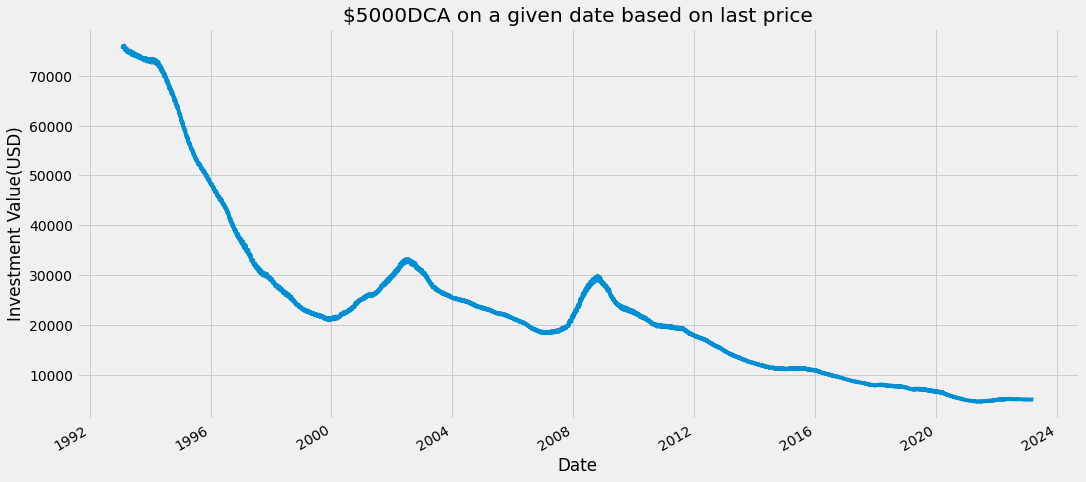

In [69]:
#Plot DCA
dca.plot(figsize = (16,8))
plt.title('$'+str(initial_investment)+'DCA on a given date based on last price')
plt.xlabel('Date')
plt.ylabel('Investment Value(USD)')

In [70]:
#Get voloatlilty
lump_sum_vol = lump_sum.pct_change().std()
dca_vol = dca.pct_change().std()
print('LS vol:', lump_sum_vol)
print('DCA vol:', dca_vol)

LS vol: 0.011948212077778414
DCA vol: 0.003685271916006586


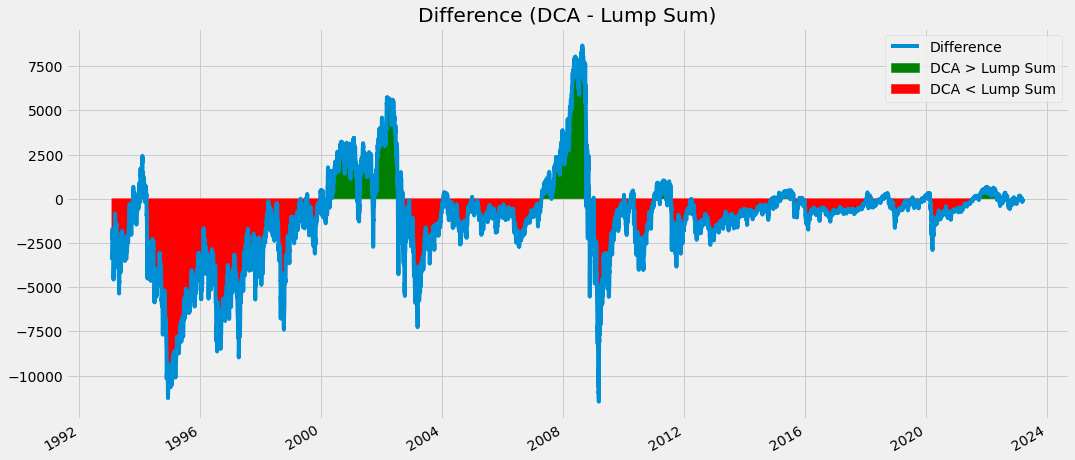

In [71]:
#Get the difference between the 2
difference = dca - lump_sum
#Plot the difference
difference.plot(figsize = (16,8), label = 'Difference')
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'green', where = difference>0, label = 'DCA > Lump Sum')
plt.fill_between(difference.index, y1 = difference, y2 = 0, color = 'red', where = difference<0, label = 'DCA < Lump Sum')
plt.title('Difference (DCA - Lump Sum)')
plt.legend()

In [72]:
#Calculate the win %
lump_sum_win_percentage = round( sum(difference<0) / len(difference) * 100, 1)
dca_win_percentage = round( sum(difference>0) / len(difference) * 100, 1)
print('LS return more than DCA ' +str(lump_sum_win_percentage)+ '% of the time')
print('DCA return more than LS ' +str(dca_win_percentage)+ '% of the time')

LS return more than DCA 76.5% of the time
DCA return more than LS 23.5% of the time
